<a href="https://colab.research.google.com/github/chandbud5/Stock_Price_Predictor/blob/master/Stock_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import csv

In [ ]:
def read_data(filename):
    dates = []
    prices = []
    with open(filename, 'r') as f:
        fReader = csv.reader(f)
        count = 0
 
        # To skip column names
        next(fReader)
        for row in fReader:
            count += 1
            dates.append(count)
            prices.append(row[1])
    return dates, prices

In [ ]:
def convert_lists(dates, prices):
    x = np.asarray(dates)
    x = x.reshape(-1, 1)

    y = np.asarray(prices)
    y = y.reshape(-1, 1)

    return x, y

In [ ]:
def svr(dates, prices, window_size):
    model = SVR(kernel='rbf', gamma=0.1, C=1e3)
    t = len(dates) - window_size
    predictions = []
    print(t)
    for i in range(t):
        x = dates[ i:i + window_size, :]
        y = prices[i:i + window_size, :]
 
        model.fit(x, y)
        ip = np.array([i + window_size])
        ip = ip.reshape(len(ip), 1)
        predictions.append(model.predict(ip))
    
    p = np.asarray(predictions, dtype='float64')
    p = p.reshape(len(p), 1)
 
    plt.figure(figsize=(16,6))
    plt.plot(dates, prices, label='Actual')
    plt.plot(dates[window_size:,:], p, label='Prediction')
    plt.show()
 
    return predictions,model

In [ ]:
date, price = read_data("/content/New Modified.csv")

In [ ]:
date = np.array(date, dtype='float64')
price = np.array(price, dtype='float64')

In [ ]:
date = date.reshape(len(date), 1)
price = price.reshape(len(price), 1)

In [ ]:
date, price

(array([[1.000e+00],
        [2.000e+00],
        [3.000e+00],
        ...,
        [6.187e+03],
        [6.188e+03],
        [6.189e+03]]), array([[  16.0098  ],
        [  16.029301],
        [  16.205   ],
        ...,
        [1847.      ],
        [1845.      ],
        [1917.800049]]))

6159


Streaming output truncated to the last 5000 lines.
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d

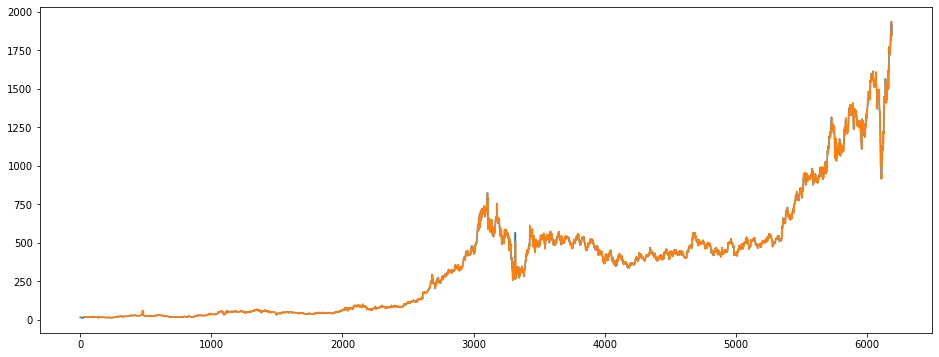

In [ ]:
pred, model = svr(date, price, 30)

In [ ]:
len(pred)

TypeError: ignored

In [ ]:
err = pred - price[30:]

TypeError: ignored

In [ ]:
err

In [ ]:
err = err**2

In [ ]:
(sum(err)/70)**0.5

array([118.14442244])

In [ ]:
model.predict(np.array(6190))

NameError: ignored